In [1]:
import numpy as np

fish_length = np.array([25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0])
fish_weight = np.array([242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9])

In [2]:
fish_data = np.column_stack((fish_length, fish_weight))

fish_target = np.concatenate((np.ones(35),np.zeros(14)))

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target)

In [4]:
# 넘파이 배열 shape : 넘파이 배열의 구조(행, 열)
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)
print(test_target)

(36, 2) (36,)
(13, 2) (13,)
[1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0.]


In [5]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [6]:
# 도미 - 길이 25cm, 무게 150g
kn.predict([[25, 150]]) # 도미(1)로 예상을 해야 되는데... 방어(0)

array([0.])

In [7]:
# 이웃 위치 번호(인덱스번호), kneighnors
distances, indexes = kn.kneighbors([[25, 150]])
print(indexes)

[[24 17  8 25 21]]


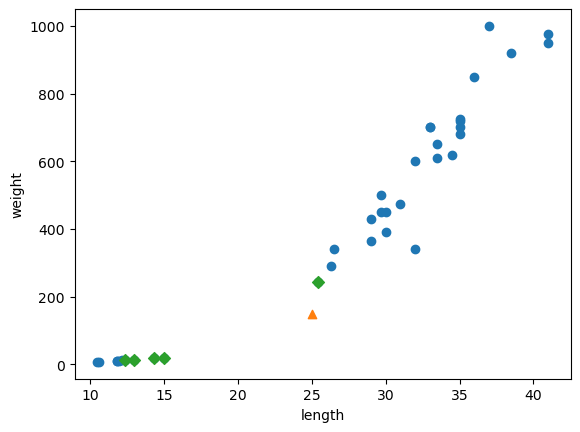

In [12]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')  # marker : ^ - 삼각형, D -> 다이아몬드 형
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
# plt.xlim((0, 1000))
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [9]:
train_target[indexes]

array([[1., 0., 0., 0., 0.]])

In [28]:
# 분산, 표준편차, 표준 점수
# mean = np.mean(train_input, axis=0) # 각 특성별 평균(열 별)
# std = np.std(train_input, axis=0) # 각 특성별 표준편차(열 별)

# 표준 점수 - 훈련 세트
# train_scaled = (train_input - mean) / std
# print(train_scaled)

# 표준 점수 - 테스트 세트 
# test_scaled = (test_input - mean) / std

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)


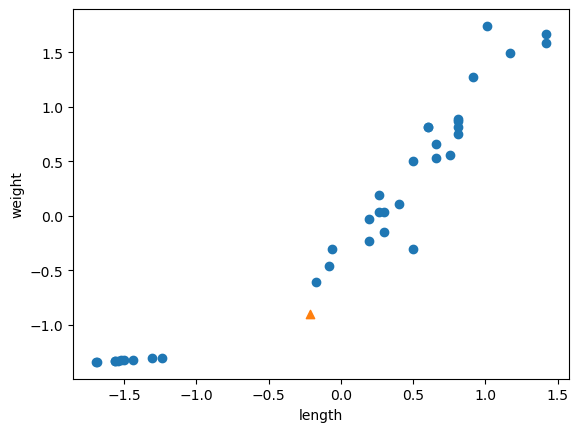

In [42]:
# new = ([25, 150] - mean) / std
new = ss.transform(np.array([[25, 150]]))
new = new[0]

plt.scatter(train_scaled[:,0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel("length")
plt.ylabel('weight')
plt.show()

In [21]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [22]:
kn.score(test_scaled, test_target)

1.0

In [23]:
kn.predict([[25, 150]])

array([1.])

In [25]:
distances, indexes = kn.kneighbors([new])
print(indexes)
print(train_target[indexes])

[[24 13 20 10 11]]
[[1. 1. 1. 1. 1.]]


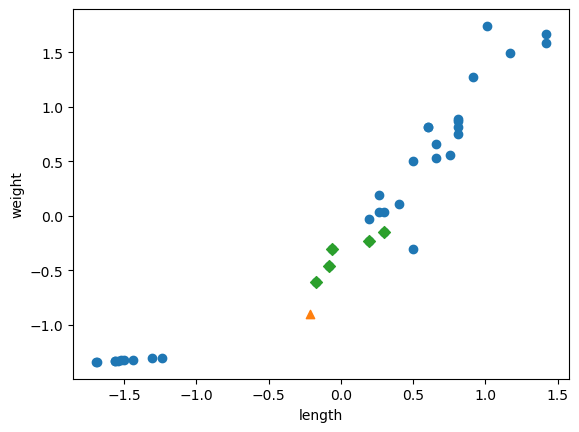

In [43]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()